# NLP of bible books

We use the CPDV-JSON encoding is derived from the Catholic Public Domain Version of the Bible, 2009 Original Edition found at: http://www.sacredbible.org/catholic/index.htm

Catholic Public Domain Version Original Edition is edited and translated by Ronald L. Conte Jr.

### reference:

https://medium.com/analytics-vidhya/nlp-of-bible-chapters-and-books-similarity-and-clustering-with-python-69c9073251e

https://bitbucket.org/sbruno/cpdv-json-encoder/src/master/

## Data Structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
%matplotlib inline

In [2]:
df = pd.read_json (r'CPDV-JSON\NT-01_Matthew.json')

Data structure: Columns represent chapters and lines represent verses.

In [3]:
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,charset
1,"The book of the lineage of Jesus Christ, the s...","And so, when Jesus had been born in Bethlehem ...","Now in those days, John the Baptist arrived, p...",Then Jesus was led by the Spirit into the dese...,"Then, seeing the crowds, he ascended the mount...","“Pay attention, lest you perform your justice ...","“Do not judge, so that you may not be judged","And when he had descended from the mountain, g...","And climbing into a boat, he crossed the sea, ...",And having called together his twelve disciple...,...,“The kingdom of heaven is like the father of a...,"And when they had drawn near to Jerusalem, and...","And responding, Jesus again spoke to them in p...","Then Jesus spoke to the crowds, and to his dis...",And Jesus departed from the temple and went aw...,“Then the kingdom of heaven shall be like ten ...,"And it happened that, when Jesus had completed...","Then, when morning arrived, all the leaders of...","Now on the morning of the Sabbath, when it beg...",UTF-8
2,Abraham conceived Isaac. And Isaac conceived J...,saying: “Where is he who was born king of the ...,and saying: “Repent. For the kingdom of heaven...,And when he had fasted for forty days and fort...,"and opening his mouth, he taught them, saying","Therefore, when you give alms, do not choose t...","For with whatever judgment you judge, so shall...","And behold, a leper, drawing near, adored him,...","And behold, they brought to him a paralytic, l...",Now the names of the twelve Apostles are these...,...,"Then, having made an agreement with the worker...",saying to them: “Go into the town that is oppo...,“The kingdom of heaven is like a man who was k...,saying: “The scribes and the Pharisees have sa...,But he said to them in response: “Do you see a...,"But five of them were foolish, and five were p...",“You know that after two days the Passover wil...,"And they led him, bound, and handed him over t...","And behold, a great earthquake occurred. For a...",UTF-8
3,And Judah conceived Perez and Zerah by Tamar. ...,"Now king Herod, hearing this, was disturbed, a...",For this is the one who was spoken of through ...,"And approaching, the tempter said to him, “If ...","“Blessed are the poor in spirit, for theirs is...","But when you give alms, do not let your left h...",And how can you see the splinter in your broth...,"And Jesus, extending his hand, touched him, sa...","And behold, some of the scribes said within th...","James of Zebedee, and John his brother, Philip...",...,"And going out about the third hour, he saw oth...","And if anyone will have said anything to you, ...",And he sent his servants to call those who wer...,"Therefore, all things whatsoever that they sha...","Then, when he was seated at the Mount of Olive...","For the five foolish, having brought their lam...",Then the leaders of the priests and the elders...,"Then Judas, who betrayed him, seeing that he h...","Now his appearance was like lightning, and his...",UTF-8
4,And Ram conceived Amminadab. And Amminadab con...,And gathering together all the leaders of the ...,Now the same John had a garment made from the ...,"And in response he said, “It has been written:...","Blessed are the meek, for they shall possess t...","so that your almsgiving may be in secret, and ...","Or how can you say to your brother, ‘Let me ta...",And Jesus said to him: “See to it that you tel...,"And when Jesus had perceived their thoughts, h...","Simon the Canaanite, and Judas Iscariot, who a...",...,"And he said to them, ‘You may go into my viney...",Now all this was done in order to fulfill what...,"Again, he sent other servants, saying, ‘Tell t...","For they bind up heavy and unbearable burdens,...","And answering, Jesus said to them: “Pay attent...","Yet truly, the prudent ones brought the oil, i...",And they took counsel so that by deceitfulness...,"saying, “I have sinned in betraying just blood...","Then, out of fear of him, the guards were terr...",UTF-8


In [4]:
df['1'][1]

'The book of the lineage of Jesus Christ, the son of David, the son of Abraham'

# Scraping

### The data was organized in chapters. For the analysis of books, the chapters were concatenated.

In [5]:
def concatenated(df):
    df.drop(['charset'], inplace=True, axis = 1)
    concatBook = str()
    for cap in df:
        for text in df[str(cap)]:
            if not pd.isnull(text):
                concatBook = concatBook + ' ' + text
    return concatBook

In [6]:
import os
text = []
size = []
directory = r'CPDV-JSON'
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        path = os.path.join(directory, filename)
        df = pd.read_json(path)
        conc = concatenated(df)
        text.append(conc)
        size.append(len(conc))
    else:
        continue

In [7]:
# new dataframe
# 1 - GP - Gospel
# 2 - NT - New Testament
# 3 - OT - Old Testament

legends = pd.read_csv("abbreviations.csv", sep=';')

title = legends['Name'].values
abbre = legends['Abb'].values
label = np.concatenate(([1 for i in range(4)], [2 for i in range(23)], [3 for i in range(46)]), axis=0)
data = np.stack((title, abbre, text, size, label), axis=1)

bible = pd.DataFrame(data, columns = ['Title','Abbreviations','Text', 'Size', 'Label'])
bible

,Title,Abbreviations,Text,Size,Label
0,Matthew,MAT,"The book of the lineage of Jesus Christ, the ...",126634,1
1,Mark,MRK,"The beginning of the Gospel of Jesus Christ, ...",80507,1
2,Luke,LUK,"Since, indeed, many have attempted to set in ...",137863,1
3,John,JHN,"In the beginning was the Word, and the Word w...",102871,1
4,Acts,ACT,"Certainly, O Theophilus, I composed the first...",135572,2
...,...,...,...,...,...
68,Haggai,HAG,"In the second year of king Darius, in the six...",5966,3
69,Zechariah,ZEC,"In the eighth month, in the second year of ki...",33887,3
70,Malachi,MAL,The burden of the word of the Lord to Israel ...,9381,3
71,1 Maccabees,1MA,"And it happened afterwards that Alexander, th...",128547,3


<BarContainer object of 13 artists>

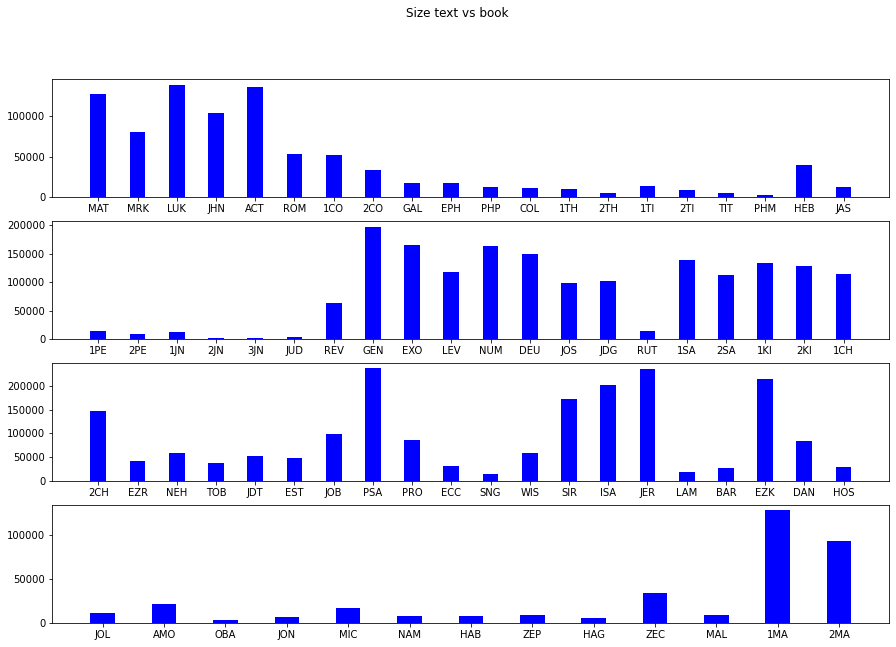

In [8]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(15,10))
fig.suptitle('Size text vs book')
ax1.bar(abbre[:20], size[:20], color ='blue', width = 0.4)
ax2.bar(abbre[20:40], size[20:40], color ='blue', width = 0.4)
ax3.bar(abbre[40:60], size[40:60], color ='blue', width = 0.4)
ax4.bar(abbre[60:73], size[60:73], color ='blue', width = 0.4)

## Preprocessing

In [9]:
# convert text to lowercase

bible['Text'] = bible['Text'].str.lower()
bible['Text'].head()

0     the book of the lineage of jesus christ, the ...
1     the beginning of the gospel of jesus christ, ...
2     since, indeed, many have attempted to set in ...
3     in the beginning was the word, and the word w...
4     certainly, o theophilus, i composed the first...
Name: Text, dtype: object

In [10]:
# remove punctuation

bible['Text'] = bible['Text'].replace(to_replace ='[%s]' % re.escape(string.punctuation), value = '', regex = True) 
bible['Text'].head()

0     the book of the lineage of jesus christ the s...
1     the beginning of the gospel of jesus christ t...
2     since indeed many have attempted to set in or...
3     in the beginning was the word and the word wa...
4     certainly o theophilus i composed the first d...
Name: Text, dtype: object

## Vectorization and Cosine Similarity

In [23]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from itertools import combinations
from sklearn.metrics.pairwise import cosine_similarity
stopWords = stopwords.words('english')

def search_similarity(df):
    cv_tfidf = TfidfVectorizer(stop_words = stopWords)
    X_tfidf = cv_tfidf.fit_transform(df).toarray()

    pairs = list(combinations(range(len(df)),2))
    results_tfidf = [cosine_similarity(X_tfidf[a_index].reshape(1,-1), 
                                       X_tfidf[b_index].reshape(1,-1)) for (a_index, b_index) in pairs]
    
    return sorted(zip(results_tfidf, pairs), reverse=True)

### Gospel

In [29]:
bible_text = bible[bible.Label == 1]['Text']
for i, t in enumerate(bible[bible.Label == 1]['Title']):
    print(i, t)
search_similarity(bible_text)

0 Matthew
1 Mark
2 Luke
3 John


[(array([[0.88421038]]), (1, 2)),
 (array([[0.86206858]]), (0, 1)),
 (array([[0.85987291]]), (0, 2)),
 (array([[0.80916738]]), (1, 3)),
 (array([[0.79713062]]), (2, 3)),
 (array([[0.78029352]]), (0, 3))]

### New Testament

In [30]:
bible_text = bible[bible.Label == 2]['Text']
for i, t in enumerate(bible[bible.Label == 2]['Title']):
    print(i, t)
search_similarity(bible_text)

0 Acts
1 Romans
2 1 Corinthians
3 2 Corinthians
4 Galatians
5 Ephesians
6 Philippians
7 Colossians
8 1 Thessalonians
9 2 Thessalonians
10 1 Timothy
11 2 Timothy
12 Titus
13 Philemon
14 Hebrews
15 James
16 1 Peter
17 2 Peter
18 1 John
19 2 John
20 3 John
21 Jude
22 Revelation


[(array([[0.67297841]]), (1, 4)),
 (array([[0.65360635]]), (5, 7)),
 (array([[0.63261594]]), (1, 2)),
 (array([[0.62346282]]), (8, 9)),
 (array([[0.61642568]]), (2, 5)),
 (array([[0.59101456]]), (1, 5)),
 (array([[0.58282782]]), (1, 3)),
 (array([[0.5825659]]), (3, 8)),
 (array([[0.5821787]]), (3, 5)),
 (array([[0.57846562]]), (2, 3)),
 (array([[0.56688022]]), (5, 6)),
 (array([[0.56483006]]), (3, 6)),
 (array([[0.55956176]]), (5, 8)),
 (array([[0.55157873]]), (1, 16)),
 (array([[0.54789711]]), (2, 8)),
 (array([[0.54198965]]), (2, 7)),
 (array([[0.538348]]), (2, 4)),
 (array([[0.53782459]]), (6, 8)),
 (array([[0.53667386]]), (5, 16)),
 (array([[0.53471338]]), (1, 6)),
 (array([[0.53467831]]), (1, 14)),
 (array([[0.53420847]]), (1, 8)),
 (array([[0.53136471]]), (5, 9)),
 (array([[0.52843346]]), (2, 6)),
 (array([[0.52180799]]), (6, 7)),
 (array([[0.50947346]]), (1, 7)),
 (array([[0.50783443]]), (3, 9)),
 (array([[0.50721416]]), (3, 7)),
 (array([[0.50561818]]), (3, 16)),
 (array([[0.50

### Old Testament

In [31]:
bible_text = bible[bible.Label == 3]['Text']
for i, t in enumerate(bible[bible.Label == 3]['Title']):
    print(i, t)
search_similarity(bible_text)

0 Genesis
1 Exodus
2 Leviticus
3 Numbers
4 Deuteronomy
5 Joshua
6 Judges
7 Ruth
8 1 Samuel
9 2 Samuel
10 1 Kings
11 2 Kings
12 1 Chronicles
13 2 Chronicles
14 Ezra
15 Nehemiah
16 Tobit
17 Judith
18 Esther (Hebrew)
19 Job
20 Psalms
21 Proverbs
22 Ecclesiastes
23 Song of Songs
24 Wisdom of Solomon
25 Sirach
26 Isaiah
27 Jeremiah
28 Lamentations
29 Baruch
30 Ezekiel
31 Daniel (Hebrew)
32 Hosea
33 Joel
34 Amos
35 Obadiah
36 Jonah
37 Micah
38 Nahum
39 Habakkuk
40 Zephaniah
41 Haggai
42 Zechariah
43 Malachi
44 1 Maccabees
45 2 Maccabees


[(array([[0.78680501]]), (10, 13)),
 (array([[0.75855416]]), (11, 13)),
 (array([[0.75815247]]), (26, 27)),
 (array([[0.75721197]]), (1, 3)),
 (array([[0.74055666]]), (20, 26)),
 (array([[0.73733457]]), (10, 11)),
 (array([[0.73499156]]), (4, 30)),
 (array([[0.7224027]]), (14, 15)),
 (array([[0.7217268]]), (2, 4)),
 (array([[0.71290932]]), (1, 4)),
 (array([[0.70920581]]), (27, 42)),
 (array([[0.70437212]]), (2, 3)),
 (array([[0.69576193]]), (26, 42)),
 (array([[0.69436483]]), (1, 2)),
 (array([[0.68253819]]), (26, 37)),
 (array([[0.67862756]]), (42, 43)),
 (array([[0.66877116]]), (26, 30)),
 (array([[0.6637778]]), (27, 30)),
 (array([[0.65863194]]), (27, 34)),
 (array([[0.65529425]]), (26, 34)),
 (array([[0.65403342]]), (3, 4)),
 (array([[0.65168531]]), (8, 9)),
 (array([[0.64961852]]), (4, 26)),
 (array([[0.64358703]]), (1, 30)),
 (array([[0.64150479]]), (13, 27)),
 (array([[0.64065032]]), (11, 27)),
 (array([[0.63100456]]), (21, 25)),
 (array([[0.62458466]]), (2, 30)),
 (array([[0.6

## Clustering

In [41]:
from sklearn.decomposition import PCA

cv_tfidf = TfidfVectorizer(stop_words = stopWords)
X_tfidf = cv_tfidf.fit_transform(bible['Text']).toarray()

pca = PCA(n_components=2, random_state=42)
df_dictionary = pd.DataFrame(pca.fit_transform(X_tfidf))

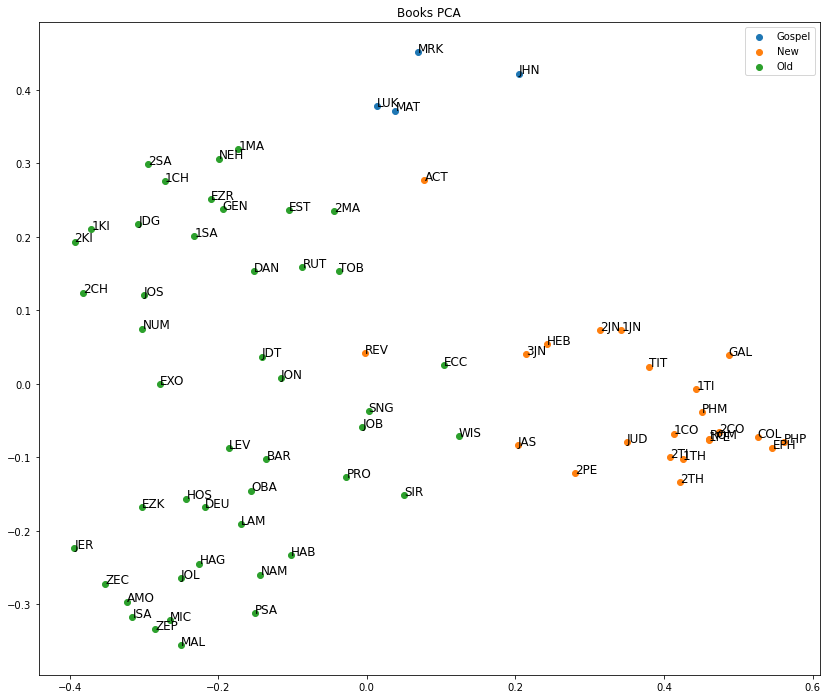

In [151]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 12)

# Chapters
ax.scatter(df_dictionary.loc[bible.Label == 1, :].iloc[:, 0], df_dictionary.loc[bible.Label == 1, :].iloc[:, 1], label='Gospel')
ax.scatter(df_dictionary.loc[bible.Label == 2, :].iloc[:, 0], df_dictionary.loc[bible.Label == 2, :].iloc[:, 1], label='New')
ax.scatter(df_dictionary.loc[bible.Label == 3, :].iloc[:, 0], df_dictionary.loc[bible.Label == 3, :].iloc[:, 1], label='Old')

for pos in df_dictionary.iterrows():
    ax.annotate(legends['Abb'][pos[0]], (pos[1][0], pos[1][1]), fontsize=12)

ax.set_title('Books PCA')
ax.legend()

## K-Means

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
for k in range(2, 10):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X_tfidf)
    distortions.append(sum(np.min(cdist(X_tfidf, k_means.cluster_centers_, 'euclidean'), axis=1)) / X_tfidf[0].shape)

In [49]:
K = range(2, 10)
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

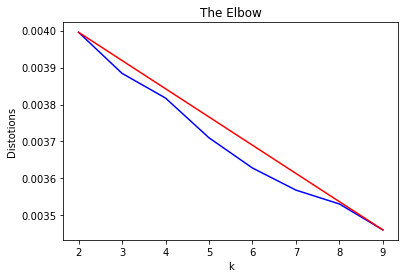

In [50]:
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distotions')
plt.title('The Elbow')
plt.show()

In [154]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_tfidf)

C:\Users\conta\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


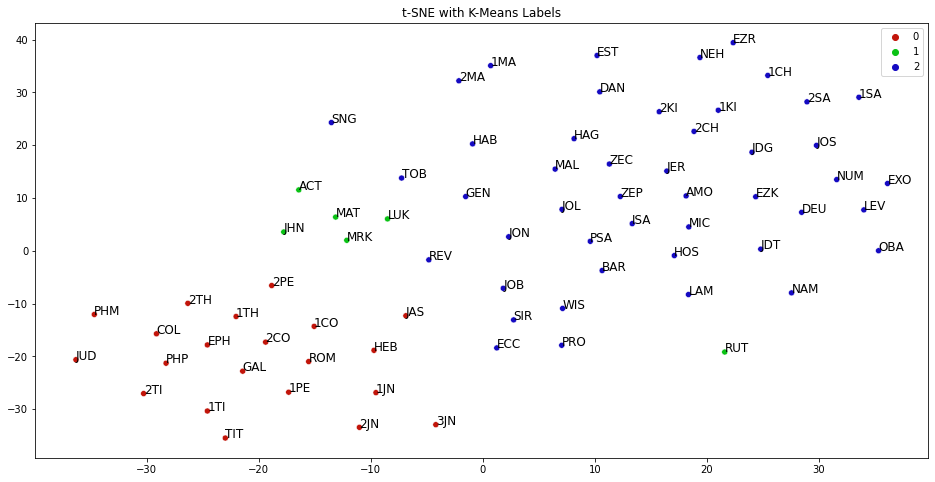

In [155]:
from sklearn.manifold import TSNE
import seaborn as sns

# Configuring seaborn color palette
palette = sns.hls_palette(k, l=.4, s=.9)

# Plotting K-Means groups using t-SNE dimensionality reduction
tsne = TSNE(random_state=42)
X_embedded = tsne.fit_transform(X_tfidf)

# Plotting result
plt.figure(figsize=(16, 8))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with K-Means Labels')

for i in range(73):
    plt.annotate(legends['Abb'][i], (X_embedded[i][0], X_embedded[i][1]), fontsize=12)

plt.show()